# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset=pd.read_csv('Successful_Startups.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Encoding categorical data

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Training the Multiple Linear Regression model on the Training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results

In [9]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


## Visualize the result to check accuracy

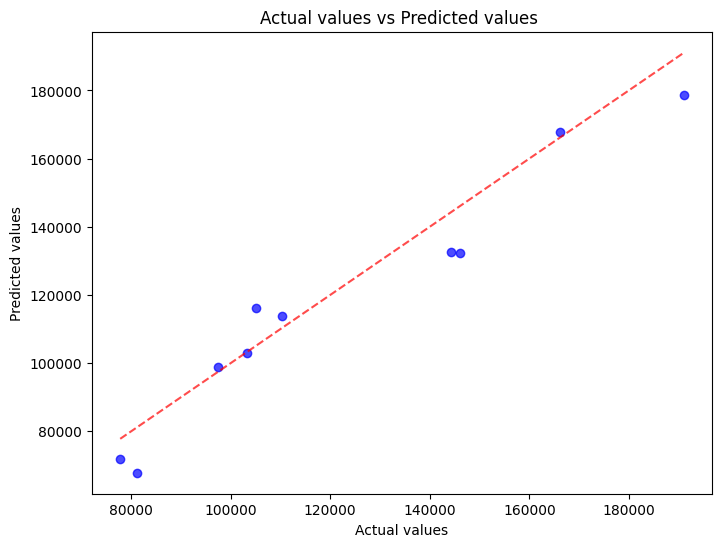

In [11]:
plt.figure(figsize=(8,6)) #row,columns
plt.scatter(y_test,y_pred,color='blue',alpha=0.7) #alpha-transparency
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title("Actual values vs Predicted values ")

plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',alpha=0.7,linestyle='--') #x,y
plt.show()